<a href="https://colab.research.google.com/github/gmlessa/challenge_dados_alura/blob/main/Challenge_Dados_Semana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importanto e analisando o banco de dados

##Importando bibliotecas a serem usadas

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
dados = pd.read_csv("https://raw.githubusercontent.com/gmlessa/challenge_dados_alura/main/dados_unidos_por_id.csv")
dados.head()

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
0,34.0,50000.0,Própria,2.0,Personal,B,12000.0,NaN,0.0,0.24,N,9
1,23.0,54000.0,Aluguel,3.0,Pagamento de débitos,A,6250.0,6.99,0.0,0.12,N,3
2,27.0,42000.0,Aluguel,2.0,Médico,A,6550.0,7.88,0.0,0.16,N,8
3,29.0,84000.0,Própria,11.0,Educativo,B,15000.0,12.18,0.0,0.18,N,10
4,29.0,35000.0,Aluguel,2.0,Educativo,A,3600.0,8.94,0.0,0.10,N,10


## Tratando dados nulos

##Dados cliente

In [88]:
dados.isnull().sum()

idade_pessoa                              320
salario_pessoa                            335
situacao_propriedade_pessoa               331
tempo_trabalhado_pessoa                  1254
motivo_emprestimo                         311
pontuacao_emprestimo                      309
valor_emprestimo                          331
taxa_juros_emprestimo                    3626
status_emprestimo                         343
porcentagem_salario_emprestimo            315
foi_inadimplente_cb                       366
tempo_primeira_solicitacao_credito_cb       0
dtype: int64

O desafio pede para remover os dados nulos, posteriormente tentarei fazer utilizar os algoritmos tratando os dados nulos de outra forma, já que removendo os nulos, perdemos bastante informações.

In [89]:
dados.dropna(inplace=True)

In [90]:
dados.shape

(28638, 12)

In [91]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 1 to 34484
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   idade_pessoa                           28638 non-null  float64
 1   salario_pessoa                         28638 non-null  float64
 2   situacao_propriedade_pessoa            28638 non-null  object 
 3   tempo_trabalhado_pessoa                28638 non-null  float64
 4   motivo_emprestimo                      28638 non-null  object 
 5   pontuacao_emprestimo                   28638 non-null  object 
 6   valor_emprestimo                       28638 non-null  float64
 7   taxa_juros_emprestimo                  28638 non-null  float64
 8   status_emprestimo                      28638 non-null  float64
 9   porcentagem_salario_emprestimo         28638 non-null  float64
 10  foi_inadimplente_cb                    28638 non-null  object 
 11  te

###Idade

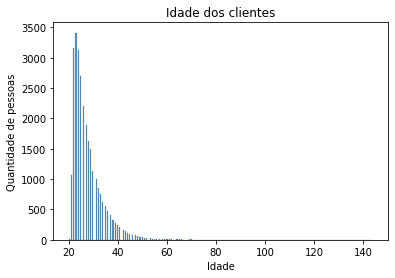

In [92]:
sns.histplot(data= dados, x="idade_pessoa")
plt.title("Idade dos clientes")
plt.xlabel("Idade")
plt.ylabel("Quantidade de pessoas")
plt.show()

É possível visualizar que existem idades até 140 anos, o que provavelmente é um erro na base de dados, então irei remover essas linhas.

In [93]:
dados.loc[dados["idade_pessoa"] > 100]

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
13766,144.0,6000000.0,Hipoteca,12.0,Personal,C,5000.0,12.73,0.0,0.00,N,25
17036,123.0,80004.0,Aluguel,2.0,Educativo,B,20400.0,10.25,0.0,0.25,N,3
22061,144.0,200000.0,Hipoteca,4.0,Educativo,B,6000.0,11.86,0.0,0.03,N,2
29262,144.0,250000.0,Aluguel,4.0,Empreendimento,C,4800.0,13.57,0.0,0.02,N,3


In [94]:
dados2 = dados.drop(dados.loc[dados["idade_pessoa"] > 100].index)
dados2.reset_index(inplace=True)
dados2.drop(columns="index", inplace=True)
dados2.tail()

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
28629,29.0,91200.0,Hipoteca,13.0,Personal,B,2000.0,11.49,0.0,0.02,N,8
28630,23.0,65000.0,Hipoteca,3.0,Médico,A,7000.0,7.90,0.0,0.11,N,4
28631,26.0,54996.0,Aluguel,8.0,Educativo,B,20000.0,12.18,1.0,0.36,N,4
28632,24.0,28590.0,Aluguel,7.0,Pagamento de débitos,D,8000.0,15.65,1.0,0.28,S,2
28633,27.0,63500.0,Aluguel,3.0,Personal,B,4000.0,10.37,0.0,0.06,N,9


In [95]:
def plotar_histograma(dados, coluna, *args, **kwargs):
  plt.figure(figsize=(10,7))
  sns.histplot(data= dados, x=coluna)
  plt.show()

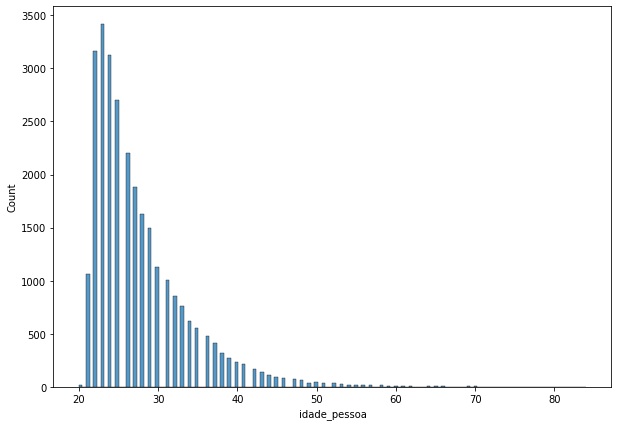

In [96]:
plotar_histograma(dados2, "idade_pessoa")

Percebemos que a maioria dos clientes da Alura Cash estão entre 20 e 30 anos. Além disso, irei transformar a idade em categorias.

In [97]:
dados2["idade_pessoa"] = pd.cut(x = dados2["idade_pessoa"], bins=[18, 25, 30, 40, 50, 60, 70, 80, 90], labels = [1, 2, 3, 4, 5, 6, 7, 8])
dados.head()

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
1,23.0,54000.0,Aluguel,3.0,Pagamento de débitos,A,6250.0,6.99,0.0,0.12,N,3
2,27.0,42000.0,Aluguel,2.0,Médico,A,6550.0,7.88,0.0,0.16,N,8
3,29.0,84000.0,Própria,11.0,Educativo,B,15000.0,12.18,0.0,0.18,N,10
4,29.0,35000.0,Aluguel,2.0,Educativo,A,3600.0,8.94,0.0,0.10,N,10
5,22.0,55000.0,Aluguel,0.0,Pagamento de débitos,D,15000.0,14.83,1.0,0.27,S,4


###Salário

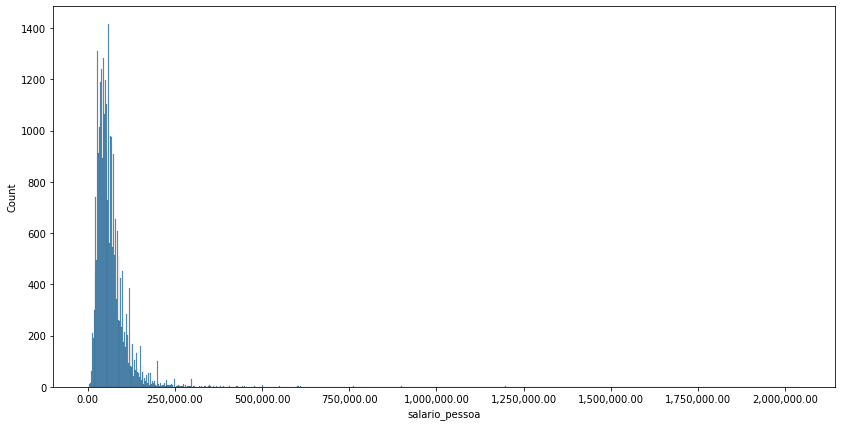

In [98]:
from matplotlib import ticker
plt.figure(figsize=(14,7))
ax = sns.histplot(data= dados2, x="salario_pessoa")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

Vamos analisar as pessoas com salário maior que 1 milhão  (lembrando que é o salário anual)

In [99]:
dados2.loc[dados2["salario_pessoa"] > 1000000]

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
12120,3,1200000.0,Hipoteca,1.0,Empreendimento,A,12000.0,7.51,0.0,0.01,N,8
22959,4,2039784.0,Aluguel,0.0,Empreendimento,C,8450.0,12.29,0.0,0.00,S,15
27096,4,1362000.0,Hipoteca,9.0,Empreendimento,A,6600.0,7.74,0.0,0.00,N,17
27178,3,1200000.0,Própria,16.0,Médico,A,10000.0,6.54,0.0,0.01,N,11
28402,6,1782000.0,Aluguel,13.0,Educativo,C,12025.0,14.27,0.0,0.01,N,30
28542,4,1440000.0,Hipoteca,7.0,Pagamento de débitos,A,6400.0,7.40,0.0,0.00,N,15


Existem algumas coisas questionáveis, como uma pessoa com 0 de tempo trabalhado ganhar mais de 1 milhão por ano, mas não vou considerar como um erro. Irei transformar o salário em faixas salariais mais tarde para não ter tanta variação e tirar estes outliers.

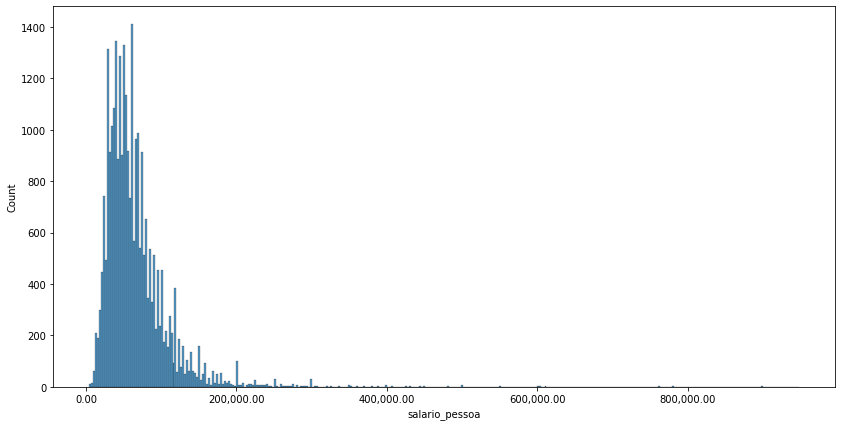

In [100]:
#Visualizando o salário anual dos clientes que são menos de 1 milhão.
plt.figure(figsize=(14,7))
ax = sns.histplot(data= dados2.loc[dados2["salario_pessoa"] < 1000000], x="salario_pessoa")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

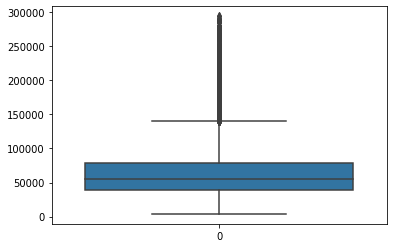

In [101]:
sns.boxplot(data= dados2.loc[dados2["salario_pessoa"] < 300000]["salario_pessoa"], orient="v")

Podemos ver que 75% dos clientes ganham entre cinquenta mil e cem mil por ano.

Segundo o site infomoney as classes de renda são divididas da seguinte forma:

Estratificação dos domicílios em 2022:

Classe A: 2,8% (renda mensal domiciliar superior a 22 mil reais)

Classe B: 13,2% (renda mensal domiciliar entre 7,1 mil e 22 mil reais)

Classe C: 33,3% (renda mensal domiciliar entre 2,9 mil e 7,1 mil reais)

Classes D/E: 50,7% (renda mensal domiciliar até 2,9 mil reais)

Fonte: https://www.infomoney.com.br/minhas-financas/classes-d-e-e-continuarao-a-ser-mais-da-metade-da-populacao-ate-2024-projeta-consultoria/#:~:text=Estratifica%C3%A7%C3%A3o%20dos%20domic%C3%ADlios%20em%202022,R%24%202%2C9%20mil)

In [102]:
#Transformando a coluna salario_pessoa para as classes logo acima
classe_e_d = 2900 * 12
classe_c = 7100 * 12
classe_b = 22200 * 12
faixa_salarial = pd.cut(x=dados2["salario_pessoa"], bins = [0, classe_e_d, classe_c, classe_b, dados2["salario_pessoa"].max()], labels=[1, 2, 3, 4])
dados3 = dados2.copy()
dados3["salario_pessoa"] = faixa_salarial

In [103]:
dados3["salario_pessoa"].value_counts(normalize=True)*100

2    61.158064
3    19.930851
1    18.251030
4     0.660054
Name: salario_pessoa, dtype: float64

Como podemos observar, 60% dos clientes estão na classe C, 19% na classe B, outros 19% na classe D e E, e 0,6% na classe A.

### Situação da propriedade

In [104]:
dados3["situacao_propriedade_pessoa"].value_counts()

Aluguel     14549
Hipoteca    11799
Própria      2192
Outro          94
Name: situacao_propriedade_pessoa, dtype: int64

A maioria das pessoas pedindo empréstimo estão em situação de aluguel e hipoteca, indicando que pessoas nesta situação tendem a pedir mais empréstimos.

In [105]:
troca = {
    "Aluguel" : 1,
    "Hipoteca" : 2,
    "Própria" : 3,
    "Outro" : 4
}

dados4 = dados3.copy()
dados4["situacao_propriedade_pessoa"] = dados4["situacao_propriedade_pessoa"].map(troca)

###Tempo trabalhado

In [106]:
dados4["tempo_trabalhado_pessoa"].value_counts()

0.0      3708
2.0      3468
3.0      3133
5.0      2715
1.0      2644
4.0      2569
6.0      2394
7.0      1971
8.0      1534
9.0      1227
11.0      663
10.0      631
12.0      518
13.0      380
14.0      306
15.0      213
16.0      152
17.0      115
18.0       96
19.0       61
20.0       36
21.0       33
22.0       18
23.0       10
25.0        8
24.0        8
27.0        5
26.0        4
31.0        4
28.0        2
123.0       2
30.0        2
29.0        1
41.0        1
38.0        1
34.0        1
Name: tempo_trabalhado_pessoa, dtype: int64

A maior parte dos clientes trabalharam de 0 a 3 anos.

##Dados de empréstimo

###Motivo do empréstimo

In [107]:
dados4["motivo_emprestimo"].value_counts()

Educativo               5702
Médico                  5293
Empreendimento          5000
Personal                4876
Pagamento de débitos    4565
Melhora do lar          3198
Name: motivo_emprestimo, dtype: int64

O motivo do empréstimo está bem balanceado e distribuído.

In [108]:
troca = {
    "Educativo" : 1,
    "Médico" : 2,
    "Empreendimento": 3,
    "Personal" : 4,
    "Pagamento de débitos" : 5,
    "Melhora do lar": 6
}

dados5 = dados4.copy()
dados5["motivo_emprestimo"] = dados5["motivo_emprestimo"].map(troca)

###Pontuacao Emprestimo

In [109]:
dados5["pontuacao_emprestimo"].value_counts()

A    9402
B    9149
C    5697
D    3248
E     870
F     209
G      59
Name: pontuacao_emprestimo, dtype: int64

A maior parte dos clientes estão pontuando A e B

In [110]:
troca = {
    "A" : 1,
    "B" : 2,
    "C": 3,
    "D" : 4,
    "E" : 5,
    "F": 6,
    "G": 7
}
dados6 = dados5.copy()
dados6["pontuacao_emprestimo"] = dados6["pontuacao_emprestimo"].map(troca)
dados6.head()

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
0,1,2,1,3.0,5,1,6250.0,6.99,0.0,0.12,N,3
1,2,2,1,2.0,2,1,6550.0,7.88,0.0,0.16,N,8
2,2,2,3,11.0,1,2,15000.0,12.18,0.0,0.18,N,10
3,2,2,1,2.0,1,1,3600.0,8.94,0.0,0.10,N,10
4,1,2,1,0.0,5,4,15000.0,14.83,1.0,0.27,S,4


### Valor Empréstimo

In [111]:
dados6["valor_emprestimo"].max()

35000.0

In [112]:
dados6["valor_emprestimo"].min()

500.0

Arbitrariamente, vou dividir o valor do emprestimo em 35 categorias, de mil em mil para melhorar a performance do modelo de machine learning.

In [113]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder

# colunas_categoricas = ["motivo_emprestimo"]

# one_hot_enc = make_column_transformer(
#     (OneHotEncoder(handle_unknown = 'ignore'),
#     colunas_categoricas),
#     remainder='passthrough')

# dados5 = one_hot_enc.fit_transform(dados4)
# dados5 = pd.DataFrame(dados5, columns=one_hot_enc.get_feature_names_out())
# dados5.head()

In [114]:
dados6['valor_emprestimo'] = pd.cut(x = dados6['valor_emprestimo'], bins=np.arange(0, 36000, 1000), 
                                         labels = np.arange(1, 36))

In [115]:
dados6['valor_emprestimo'].value_counts()

10    2944
5     2849
6     2405
8     2355
4     1929
12    1916
3     1871
7     1709
15    1627
2     1259
9     1196
20     987
25     849
14     661
11     636
13     590
16     567
18     508
17     278
24     276
1      274
21     179
35     158
19     155
22     153
30     100
23      73
28      70
26      18
32      15
34       7
27       6
33       6
29       5
31       3
Name: valor_emprestimo, dtype: int64

###Taxa de Juros

In [116]:
dados6['taxa_juros_emprestimo'].max()

23.22

In [117]:
dados6['taxa_juros_emprestimo'].min()

5.42

O mínimo de taxa que a instituição financeira cobra é de 5,42% de juros, chegando a 23,22%. Por enquanto, irei manter a coluna do jeito que está.

###Possibilidade de Inadimplência

In [119]:
dados6["status_emprestimo"].value_counts()

0.0    22431
1.0     6203
Name: status_emprestimo, dtype: int64

Como podemos ver, nossa coluna alvo está desbalanceada, então temos que prestar muita atenção nas métricas para avaliar o modelo a ser implementado da melhor forma possível.

### Razão Salário / Empréstimo

In [122]:
dados6["porcentagem_salario_emprestimo"].min()

0.0

In [126]:
dados.loc[dados["porcentagem_salario_emprestimo"] == 0]

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
2098,43.0,780000.0,Hipoteca,2.0,Melhora do lar,A,1000.0,8.94,0.0,0.0,N,11
13766,144.0,6000000.0,Hipoteca,12.0,Personal,C,5000.0,12.73,0.0,0.0,N,25
16869,35.0,510000.0,Aluguel,1.0,Personal,C,1800.0,13.48,0.0,0.0,N,6
18199,30.0,522000.0,Hipoteca,11.0,Melhora do lar,A,2500.0,7.43,0.0,0.0,N,9
25431,34.0,948000.0,Hipoteca,18.0,Personal,B,2000.0,9.99,0.0,0.0,N,7
27621,42.0,2039784.0,Aluguel,0.0,Empreendimento,C,8450.0,12.29,0.0,0.0,S,15
32640,47.0,1362000.0,Hipoteca,9.0,Empreendimento,A,6600.0,7.74,0.0,0.0,N,17
34376,44.0,1440000.0,Hipoteca,7.0,Pagamento de débitos,A,6400.0,7.40,0.0,0.0,N,15


Existem alguns clientes com a razão entre o slário e o empréstimo igual a 0, isso está ocorrendo devido aos clientes com um salário muito alto estarem pedindo empréstimos com valor baixo, então sem problemas aqui

In [127]:
dados6["porcentagem_salario_emprestimo"].max()

0.83

## Histórico de bancos cliente

###Foi inadimplente

In [128]:
dados6["foi_inadimplente_cb"].value_counts()

N    23531
S     5103
Name: foi_inadimplente_cb, dtype: int64

Assim como a coluna alvo, a maioria dos clientes não foram inadimplentes. Precisamos trocar para 0 e 1.

In [131]:
troca = {
    "N" : 0,
    "S" : 1
}
dados7 = dados6.copy()
dados7["foi_inadimplente_cb"] = dados7["foi_inadimplente_cb"].map(troca)
dados7.head()

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
0,1,2,1,3.0,5,1,7,6.99,0.0,0.12,0,3
1,2,2,1,2.0,2,1,7,7.88,0.0,0.16,0,8
2,2,2,3,11.0,1,2,15,12.18,0.0,0.18,0,10
3,2,2,1,2.0,1,1,4,8.94,0.0,0.10,0,10
4,1,2,1,0.0,5,4,15,14.83,1.0,0.27,1,4


###Tempo desde a primeira solicitação de crédito

In [132]:
dados7["tempo_primeira_solicitacao_credito_cb"].min()

2

In [133]:
dados7["tempo_primeira_solicitacao_credito_cb"].max()

30

O tempo, em anos, que os clientes fizeram uma solicitação de crédito ou adquiriram um cartão de crédito foram entre 2 e 30 anos. Irei dividir tudo por 10 para diminuir a escala.

In [134]:
dados8 = dados7.copy()
dados8["tempo_primeira_solicitacao_credito_cb"] = dados8["tempo_primeira_solicitacao_credito_cb"]/10
dados8["tempo_primeira_solicitacao_credito_cb"].head()

0    0.3
1    0.8
2    1.0
3    1.0
4    0.4
Name: tempo_primeira_solicitacao_credito_cb, dtype: float64

#Machine Learning

Agora que temos a base de dados tratada, vamos começar a implementar os modelos de Machine Learning

In [136]:
dados_tratados = dados8.copy()
dados_tratados.head()

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
0,1,2,1,3.0,5,1,7,6.99,0.0,0.12,0,0.3
1,2,2,1,2.0,2,1,7,7.88,0.0,0.16,0,0.8
2,2,2,3,11.0,1,2,15,12.18,0.0,0.18,0,1.0
3,2,2,1,2.0,1,1,4,8.94,0.0,0.10,0,1.0
4,1,2,1,0.0,5,4,15,14.83,1.0,0.27,1,0.4


##Correlação entre as variáveis

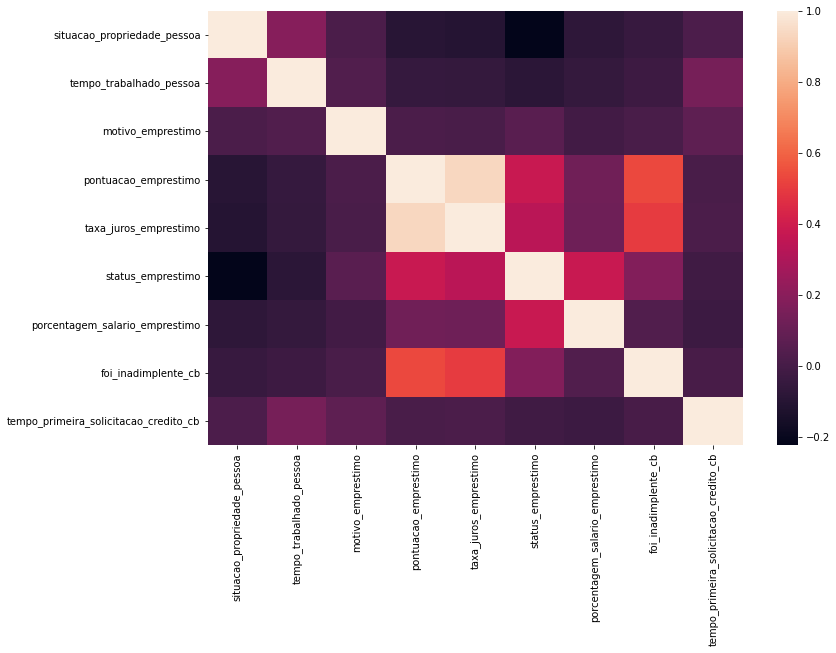

In [141]:
plt.figure(figsize=(12,8))
sns.heatmap(dados_tratados.corr(), )

Como podemos observar, temos algumas correlações entre o status do emprestimo com a pontuacao do emprestimo, a taxa de juros, a porcentagem do salario e se o cliente já foi inadimplente.

##Criação dos modelos

Para otimizar tempo e hiperparâmetros, irei utilizar funções genéricas para os modelos. Irei utilizar por enquanto a regressão linear, árvore de decisão e Naive Bayes como modelos, já que são os algoritmos mais utilizados para essa finalidade.

A função utilizada para rodar os modelos foi criada anteriormente no curso de machine learning da Alura.

In [153]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

#funcao 'roda_modelo': ajuste a validacao
def roda_modelo(base_dados, classificador):

#separando a base de modelagem e variavel resposta

    y = base_dados['status_emprestimo']
    x = base_dados.drop(columns='status_emprestimo')

#separando a base de treino e teste

    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print(f'A base de treino tem {base_treino} elementos e a base de teste tem {base_teste} elementos.')
    print(100*'-')

#ajustando modelo com base de teste
    
    modelo = classificador
    modelo.fit(treino_x, treino_y)

#-------------------------------------------------------------------------------------------------------------------------------------

#matriz de confusao

    matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format = '.4g', cmap = 'Blues')
    plt.title('Matriz de Confusao')
    plt.show

#classification report

    previsoes = modelo.predict(teste_x)

    print('\nClassification Report:')
    print(classification_report(teste_y, previsoes))

#curva ROC  e AUC

    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
   
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_auc:', roc_auc_score(teste_y, prob_previsao))
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha pontilhada guia para regressao aleatoria
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha pontilhada guia para regressao perfeita
    plt.ylabel('Sensibilidade')
    plt.xlabel('Especificidade')
    plt.show() 

    return modelo, matriz_confusao

###Regressão Linear

A base de treino tem 20043 elementos e a base de teste tem 8591 elementos.
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      6696
         1.0       0.75      0.49      0.59      1895

    accuracy                           0.85      8591
   macro avg       0.81      0.72      0.75      8591
weighted avg       0.84      0.85      0.84      8591

----------------------------------------------------------------------------------------------------
roc_auc: 0.8643457441610475


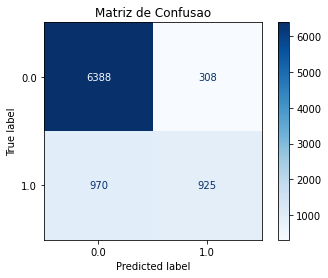

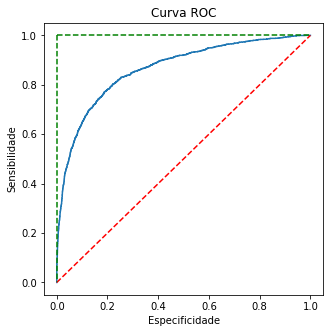

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f85151e8b90>)

In [154]:
from sklearn.linear_model import LogisticRegression

roda_modelo(dados_tratados, LogisticRegression(max_iter=1000))


In [166]:
from sklearn.dummy import DummyClassifier

y = dados_tratados['status_emprestimo']
x = dados_tratados.drop(columns='status_emprestimo')

dummy = DummyClassifier(strategy="stratified")
dummy.fit(x, y)
previsoes = dummy.predict(x)
dummy.score(x, y)
print(classification_report(y, previsoes))


              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78     22431
         1.0       0.21      0.21      0.21      6203

    accuracy                           0.66     28634
   macro avg       0.50      0.50      0.50     28634
weighted avg       0.66      0.66      0.66     28634



Nosso modelo de regressão linear conseguiu ser melhor do que um modelo aleatório, no entanto, a pontuação de precision e recall ainda estão baixas, principalmente o recall.

###Random Forest

A base de treino tem 20043 elementos e a base de teste tem 8591 elementos.
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      6696
         1.0       0.96      0.68      0.79      1895

    accuracy                           0.92      8591
   macro avg       0.94      0.83      0.87      8591
weighted avg       0.93      0.92      0.92      8591

----------------------------------------------------------------------------------------------------
roc_auc: 0.9172095812724803


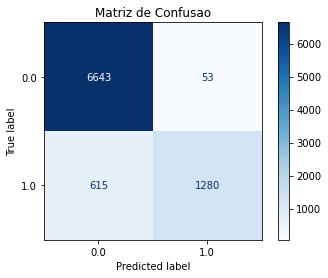

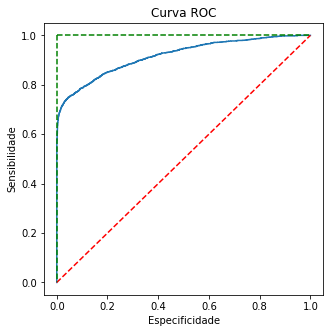

(RandomForestClassifier(max_depth=10, n_estimators=50),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f85153af110>)

In [168]:
from sklearn.ensemble import RandomForestClassifier

roda_modelo(dados_tratados, RandomForestClassifier(n_estimators = 50, max_depth = 10))

Utilizando o Random Forest com estes parâmetros, podemos observar que o precision e o recall melhoraram drasticamente, sendo um ótimo candidato por enquanto.

###Nayve Bayes

A base de treino tem 20043 elementos e a base de teste tem 8591 elementos.
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      6696
         1.0       0.60      0.51      0.55      1895

    accuracy                           0.82      8591
   macro avg       0.74      0.71      0.72      8591
weighted avg       0.81      0.82      0.81      8591

----------------------------------------------------------------------------------------------------
roc_auc: 0.8270623504600865


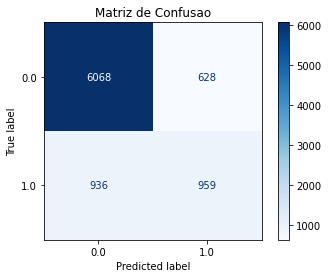

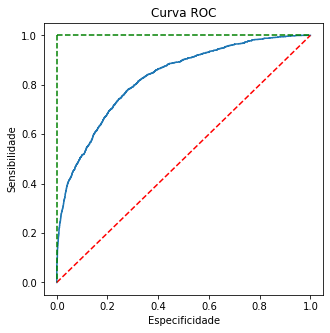

(CategoricalNB(),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f8514e61b10>)

In [170]:
from sklearn.naive_bayes import CategoricalNB

roda_modelo(dados_tratados, CategoricalNB())

O Nayve Bayes também não performou muito melhor do que a regressão linear. Resta agora mexer com os hiperparâmetros e balancear melhor a base de dados para poder fazer outros testes.

##Balanceamento da variável alvo

In [193]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

y = dados_tratados['status_emprestimo']
x = dados_tratados.drop(columns='status_emprestimo')
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)
print(sorted(Counter(y_resampled).items()))

[(0.0, 22431), (1.0, 22431)]


In [194]:
x_resampled.head()

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,porcentagem_salario_emprestimo,foi_inadimplente_cb,tempo_primeira_solicitacao_credito_cb
0,1,2,1,3.0,5,1,7,6.99,0.12,0,0.3
1,2,2,1,2.0,2,1,7,7.88,0.16,0,0.8
2,2,2,3,11.0,1,2,15,12.18,0.18,0,1.0
3,2,2,1,2.0,1,1,4,8.94,0.10,0,1.0
4,1,2,1,0.0,5,4,15,14.83,0.27,1,0.4


In [195]:
x_resampled.isnull().sum()

idade_pessoa                             0
salario_pessoa                           0
situacao_propriedade_pessoa              0
tempo_trabalhado_pessoa                  0
motivo_emprestimo                        0
pontuacao_emprestimo                     0
valor_emprestimo                         0
taxa_juros_emprestimo                    0
porcentagem_salario_emprestimo           0
foi_inadimplente_cb                      0
tempo_primeira_solicitacao_credito_cb    0
dtype: int64

In [196]:
y_resampled.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: status_emprestimo, dtype: float64

In [197]:
y_resampled.isnull().sum()

0

In [198]:
def roda_modelo_balanceado(base_dados, classificador):

#separando a base de modelagem e variavel resposta

    y = y_resampled
    x = x_resampled

#separando a base de treino e teste

    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print(f'A base de treino tem {base_treino} elementos e a base de teste tem {base_teste} elementos.')
    print(100*'-')

#ajustando modelo com base de teste
    
    modelo = classificador
    modelo.fit(treino_x, treino_y)

#-------------------------------------------------------------------------------------------------------------------------------------

#matriz de confusao

    matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format = '.4g', cmap = 'Blues')
    plt.title('Matriz de Confusao')
    plt.show

#classification report

    previsoes = modelo.predict(teste_x)

    print('\nClassification Report:')
    print(classification_report(teste_y, previsoes))

#curva ROC  e AUC

    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
   
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_auc:', roc_auc_score(teste_y, prob_previsao))
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha pontilhada guia para regressao aleatoria
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha pontilhada guia para regressao perfeita
    plt.ylabel('Sensibilidade')
    plt.xlabel('Especificidade')
    plt.show() 

    return modelo, matriz_confusao

###Regressão Linear

A base de treino tem 31403 elementos e a base de teste tem 13459 elementos.
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      6736
         1.0       0.79      0.79      0.79      6723

    accuracy                           0.79     13459
   macro avg       0.79      0.79      0.79     13459
weighted avg       0.79      0.79      0.79     13459

----------------------------------------------------------------------------------------------------
roc_auc: 0.8668447432732602


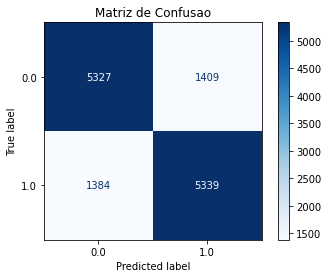

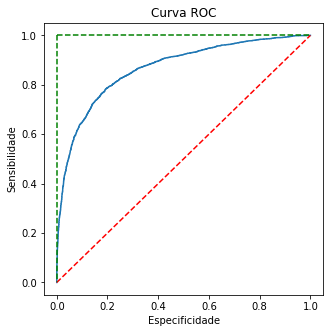

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f8514f478d0>)

In [199]:
roda_modelo_balanceado(dados_tratados, LogisticRegression(max_iter=1000))

O Balanceamento ajudou muito com a Regressão Logística, a precisão não melhorou muito, mas o recall aumentou de 0,49 para 0,79. Indicando que houve sim melhora com o balanceamento.

###Random Forest

A base de treino tem 31403 elementos e a base de teste tem 13459 elementos.
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      6736
         1.0       0.92      0.80      0.85      6723

    accuracy                           0.86     13459
   macro avg       0.87      0.86      0.86     13459
weighted avg       0.87      0.86      0.86     13459

----------------------------------------------------------------------------------------------------
roc_auc: 0.9383389765625358


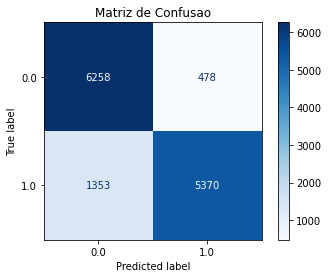

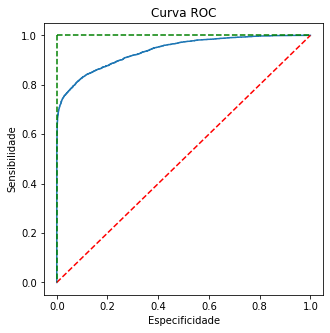

(RandomForestClassifier(max_depth=10, n_estimators=50),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f8511425a90>)

In [200]:
roda_modelo_balanceado(dados_tratados, RandomForestClassifier(n_estimators = 50, max_depth = 10))

Mais uma vez, o balanceamento foi de grande ajuda para a performance do modelo, podemos observar que apesar de uma leve piora na precisão, o recall melhorou, assim como na regressão linear.

###Nayve Bayes

A base de treino tem 31403 elementos e a base de teste tem 13459 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76      6736
         1.0       0.77      0.70      0.73      6723

    accuracy                           0.75     13459
   macro avg       0.75      0.75      0.75     13459
weighted avg       0.75      0.75      0.75     13459

----------------------------------------------------------------------------------------------------
roc_auc: 0.8300836847875358


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


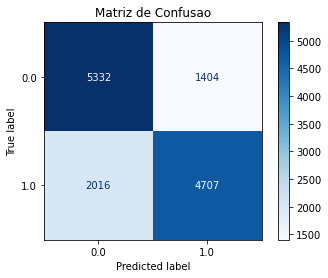

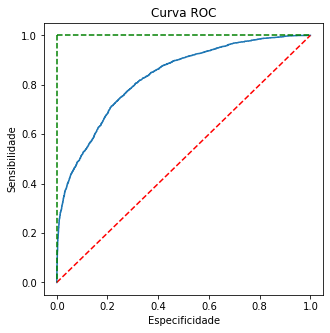

(CategoricalNB(),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f8511383790>)

In [201]:
roda_modelo_balanceado(dados_tratados, CategoricalNB())

Também houve melhoras no Nayve Bayes utilizando o balanceamento, no entanto, este modelo ficou um pouco para trás dos outros 2 comparando as métricas.

#Exportando os modelos

A base de treino tem 31403 elementos e a base de teste tem 13459 elementos.
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      6736
         1.0       0.79      0.79      0.79      6723

    accuracy                           0.79     13459
   macro avg       0.79      0.79      0.79     13459
weighted avg       0.79      0.79      0.79     13459

----------------------------------------------------------------------------------------------------
roc_auc: 0.8668447432732602


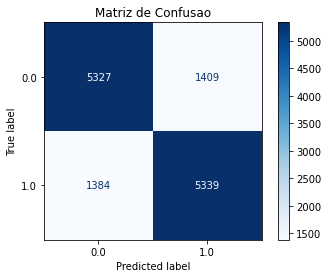

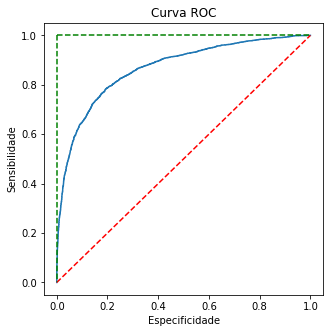

array([0., 0., 0.])

In [214]:
from joblib import Parallel, delayed
import joblib

regressao_linear, _ = roda_modelo_balanceado(dados_tratados, LogisticRegression(max_iter=1000))

joblib.dump(regressao_linear, 'modelo1.pkl')
regressao_joblib = knn_from_joblib = joblib.load('modelo1.pkl')
regressao_joblib.predict(x_resampled[:3])

Através da biblioteca joblib, consegui salvar o arquivo no formato pkl, e através dele, utilizei o modelo para fazer predições, para provar que está funcionando.

#Considerações Finais

Meu tempo foi muito limitado para focar em colocar a mão na massa para essa semana do desafio, no entanto, estou muito satisfeito com os resultados, consegui tratar a base de dados, fazer o encoding, tratar os outliers, fazer o balanceamento da variável alvo, utilizei 3 algoritmos de machine Learning diferente e consegui exportar um modelo para ser utilizado em outros lugares posteriormente.

Sei que ainda há muito o que melhorar, eu não cheguei a testar os hiperparâmetros. A forma em que fiz o enconding não foi a das melhores, já que fiz de forma arbitrária e sei que existem métodos melhores para variáveis categóricas como o One Hot Encoding. Fazendo isso, com certeza irei melhorar bastante as métricas dos resultados obtidos, no entanto, para poder entregar algo para a semana do desafio, optei por manter assim mesmo.